# Modules

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read data

In [24]:
df = pd.read_csv('WZUM_dataset.csv', index_col=0)

In [25]:
print(df.describe())

       landmark_0.x  landmark_0.y  landmark_0.z  landmark_1.x  landmark_1.y  \
count   3618.000000   3618.000000  3.618000e+03   3618.000000   3618.000000   
mean       0.502917      0.694895  1.685707e-09      0.504923      0.649097   
std        0.199441      0.127179  7.035123e-09      0.165386      0.118235   
min        0.020139      0.211821 -3.429728e-08      0.071752      0.244683   
25%        0.332070      0.617881 -1.330942e-09      0.373293      0.574702   
50%        0.500932      0.709572  2.063241e-09      0.509664      0.657983   
75%        0.673921      0.783305  5.550776e-09      0.636580      0.733296   
max        1.006300      1.070837  2.496339e-08      0.937468      1.054156   

       landmark_1.z  landmark_2.x  landmark_2.y  landmark_2.z  landmark_3.x  \
count   3618.000000   3618.000000   3618.000000   3618.000000   3618.000000   
mean      -0.017730      0.506529      0.582097     -0.034486      0.507385   
std        0.043020      0.149173      0.115835    

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Columns: 129 entries, landmark_0.x to letter
dtypes: float64(127), object(2)
memory usage: 3.6+ MB
None


In [27]:
print(df.columns)

Index(['landmark_0.x', 'landmark_0.y', 'landmark_0.z', 'landmark_1.x',
       'landmark_1.y', 'landmark_1.z', 'landmark_2.x', 'landmark_2.y',
       'landmark_2.z', 'landmark_3.x',
       ...
       'world_landmark_18.z', 'world_landmark_19.x', 'world_landmark_19.y',
       'world_landmark_19.z', 'world_landmark_20.x', 'world_landmark_20.y',
       'world_landmark_20.z', 'handedness.score', 'handedness.label',
       'letter'],
      dtype='object', length=129)


# X, y split

In [28]:
y = df['letter']
columns_to_drop = ['world_landmark_0.x','world_landmark_0.y','world_landmark_0.z','world_landmark_1.x','world_landmark_1.y','world_landmark_1.z','world_landmark_2.x','world_landmark_2.y','world_landmark_2.z','world_landmark_3.x','world_landmark_3.y','world_landmark_3.z','world_landmark_4.x','world_landmark_4.y','world_landmark_4.z','world_landmark_5.x','world_landmark_5.y','world_landmark_5.z','world_landmark_6.x','world_landmark_6.y','world_landmark_6.z','world_landmark_7.x','world_landmark_7.y','world_landmark_7.z','world_landmark_8.x','world_landmark_8.y','world_landmark_8.z','world_landmark_9.x','world_landmark_9.y','world_landmark_9.z','world_landmark_10.x','world_landmark_10.y','world_landmark_10.z','world_landmark_11.x','world_landmark_11.y','world_landmark_11.z','world_landmark_12.x','world_landmark_12.y','world_landmark_12.z','world_landmark_13.x','world_landmark_13.y','world_landmark_13.z','world_landmark_14.x','world_landmark_14.y','world_landmark_14.z','world_landmark_15.x','world_landmark_15.y','world_landmark_15.z','world_landmark_16.x','world_landmark_16.y','world_landmark_16.z','world_landmark_17.x','world_landmark_17.y','world_landmark_17.z','world_landmark_18.x','world_landmark_18.y','world_landmark_18.z','world_landmark_19.x','world_landmark_19.y','world_landmark_19.z','world_landmark_20.x','world_landmark_20.y','world_landmark_20.z','handedness.score','handedness.label','letter']
X = df.drop(columns_to_drop, axis=1)

In [29]:
print(X.describe())

       landmark_0.x  landmark_0.y  landmark_0.z  landmark_1.x  landmark_1.y  \
count   3618.000000   3618.000000  3.618000e+03   3618.000000   3618.000000   
mean       0.502917      0.694895  1.685707e-09      0.504923      0.649097   
std        0.199441      0.127179  7.035123e-09      0.165386      0.118235   
min        0.020139      0.211821 -3.429728e-08      0.071752      0.244683   
25%        0.332070      0.617881 -1.330942e-09      0.373293      0.574702   
50%        0.500932      0.709572  2.063241e-09      0.509664      0.657983   
75%        0.673921      0.783305  5.550776e-09      0.636580      0.733296   
max        1.006300      1.070837  2.496339e-08      0.937468      1.054156   

       landmark_1.z  landmark_2.x  landmark_2.y  landmark_2.z  landmark_3.x  \
count   3618.000000   3618.000000   3618.000000   3618.000000   3618.000000   
mean      -0.017730      0.506529      0.582097     -0.034486      0.507385   
std        0.043020      0.149173      0.115835    

In [30]:
print(y.describe())

count     3618
unique      24
top          m
freq       155
Name: letter, dtype: object


## Kodowanie zmiennej wyjsciowej

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[ 0  0  0 ... 23 23 23]


# Train - Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
print(len(y_test))

724


# Sprawdzenie danych

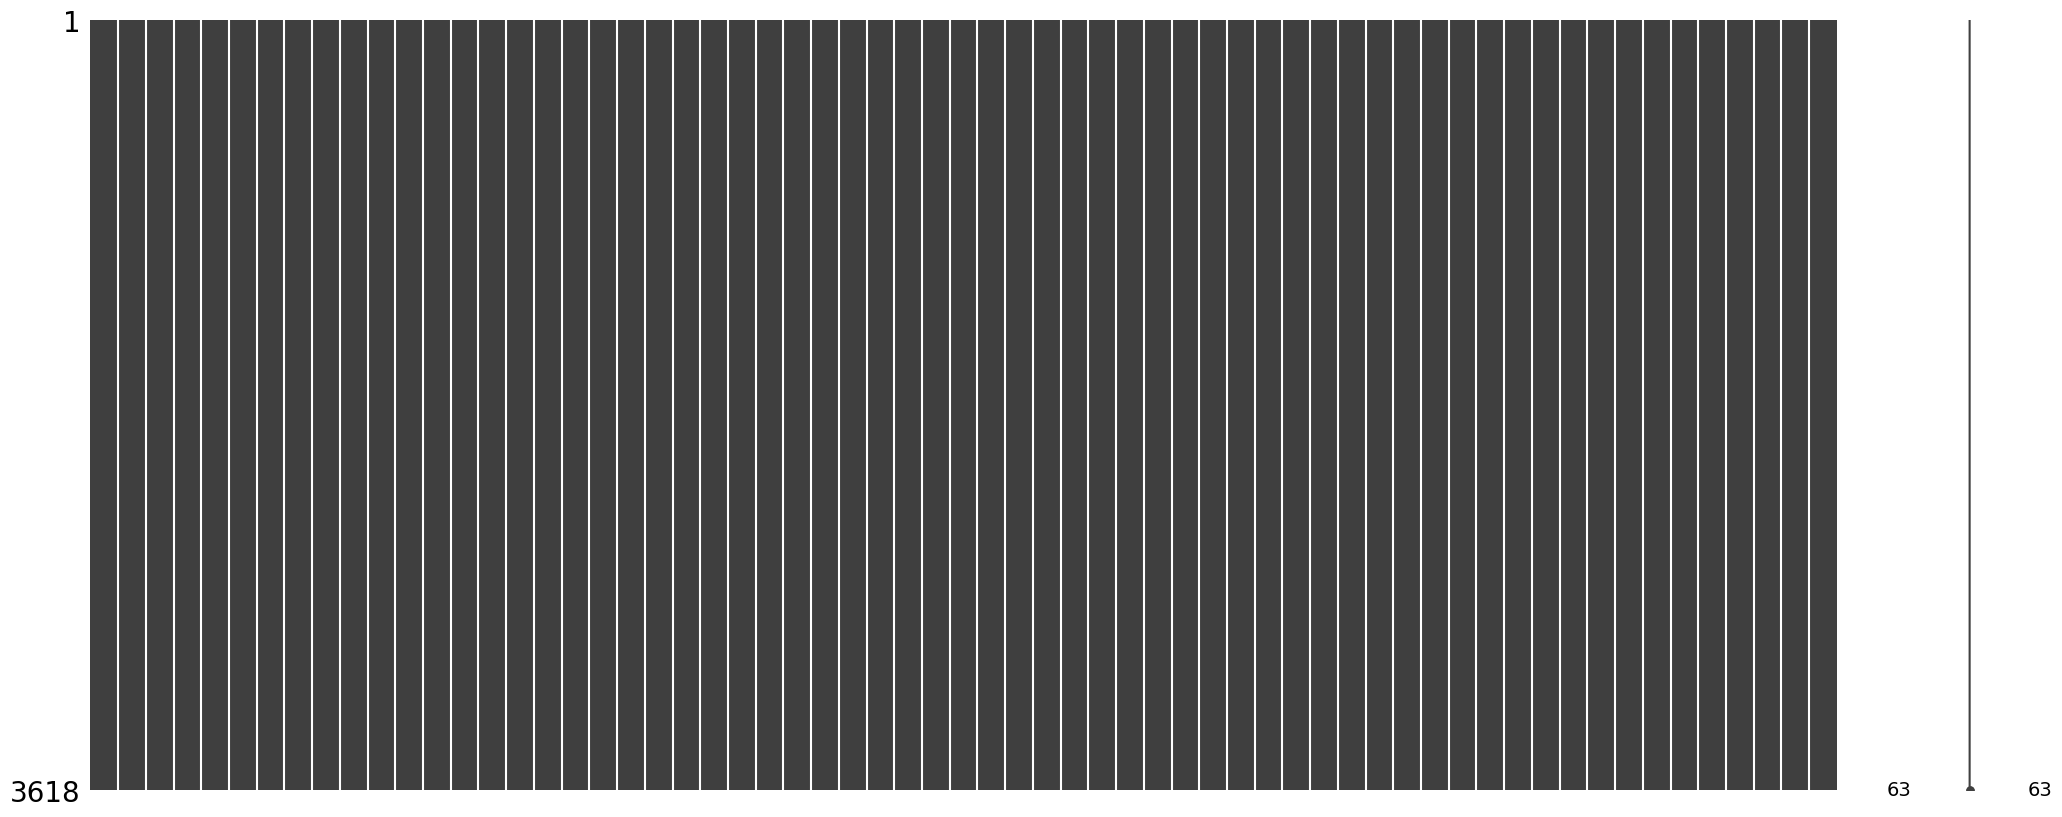

In [37]:
import missingno as msno
msno.matrix(X)
plt.show()

#

In [42]:
import seaborn as sns
X_combined = pd.concat([X, y.astype(float)], axis=1)
vars_combined = ['landmark_0.x','landmark_0.y','landmark_0.z','landmark_1.x','landmark_1.y','landmark_1.z','landmark_2.x','landmark_2.y','landmark_2.z','landmark_3.x','landmark_3.y','landmark_3.z','landmark_4.x','landmark_4.y','landmark_4.z','landmark_5.x','landmark_5.y','landmark_5.z','landmark_6.x','landmark_6.y','landmark_6.z','landmark_7.x','landmark_7.y','landmark_7.z','landmark_8.x','landmark_8.y','landmark_8.z','landmark_9.x','landmark_9.y','landmark_9.z','landmark_10.x','landmark_10.y','landmark_10.z','landmark_11.x','landmark_11.y','landmark_11.z','landmark_12.x','landmark_12.y','landmark_12.z','landmark_13.x','landmark_13.y','landmark_13.z','landmark_14.x','landmark_14.y','landmark_14.z','landmark_15.x','landmark_15.y','landmark_15.z','landmark_16.x','landmark_16.y','landmark_16.z','landmark_17.x','landmark_17.y','landmark_17.z','landmark_18.x','landmark_18.y','landmark_18.z','landmark_19.x','landmark_19.y','landmark_19.z','landmark_20.x','landmark_20.y','landmark_20.z']
sns.pairplot(X_combined.astype(float), vars=vars_combined, hue='letter')
sns.heatmap(X_combined.corr(), annot=True, cmap="coolwarm")
plt.show()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

# Klasyfikatory

## DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

confusion_matrix: 
[[14  1  0  0  1  0  0  0  1  1  0  6  0  1  0  0  0  5  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1 25  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0 22  0  0  0  0  0  1  4  0  0  0  0  0  1  1  0  1  0  0  0  0]
 [ 0  1  0  1 19  0  0  0  0  0  0  2  2  2  0  0  1  1  0  0  0  0  0  2]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  2  0  0  0  0  0  0  0  0  0  0  4  0  3  0  1  0]
 [ 0  0  0  0  0  0  2 22  0  0  0  0  0  0  0  0  0  1  4  0  0  0  1  0]
 [ 2  0  0  1  1  0  0  0 19  0  1  0  0  1  0  0  0  0  0  0  0  0  0  5]
 [ 0  0  0  3  0  0  0  0  0 21  0  0  0  0  2  0  2  0  0  0  0  0  0  0]
 [ 0  0  2  5  1  0  0  0  0  1 13  1  0  2  0  0  0  0  0  0  0  0  5  0]
 [ 6  0  0  1  2  0  0  0  1  1  0 15  1  0  0  0  0  2  0  0  0  0  0  2]
 [ 3  0  0  1  0  0  0  0  0  2  1  1 17  0  0  0  1  3  0  0  0  0  0  1]
 [ 0  

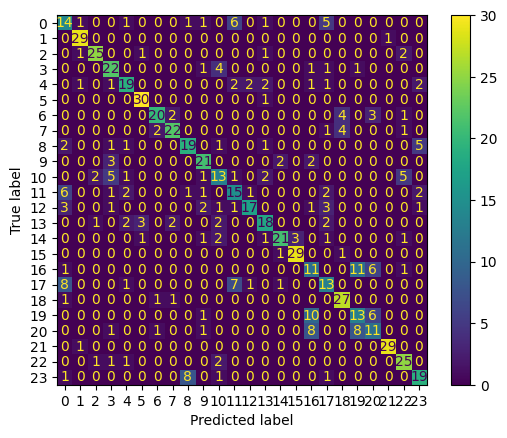

train_score: 0.6657458563535912


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
predicted = y_pred
expected = y_test
cm = confusion_matrix(expected, predicted) # Wygenerowanie tablicy pomyłek
print(f'confusion_matrix: \n{cm}') # Wyświetlenie tablicy pomyłek
disp_cm = ConfusionMatrixDisplay(cm) # Graficzne wyświetlenie tablicy pomyłek
disp_cm.plot()
plt.show()
train_score = dtc.score(X_test, y_test)
print(f'train_score: {train_score}')